In [8]:
import numpy as np

dt = 0.001
vxmax = -5/0.23

Text(0.5, 1.0, 'Cartesian Velocity')

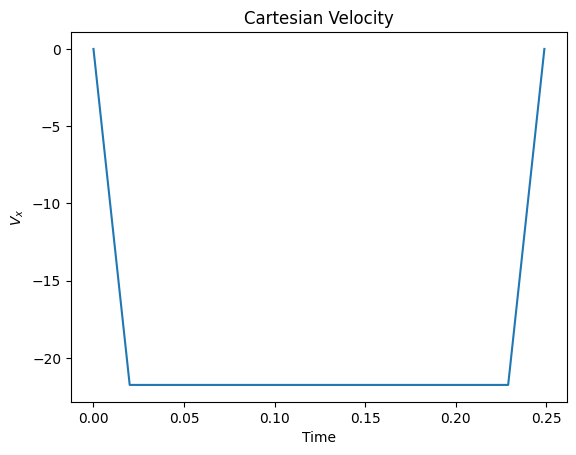

In [9]:
from matplotlib import pyplot

# Generate Vx from time, piecewise
t = np.arange(start=0, stop=0.25, step=dt)
vx = (vxmax / 0.02) * t
vx[t >= 0.02] = vxmax
vx[t >= 0.23] = vxmax - vxmax*(t[t<0.02] + dt)/0.02

pyplot.plot(t, vx)
pyplot.xlabel("Time")
pyplot.ylabel("$V_x$")
pyplot.title("Cartesian Velocity")

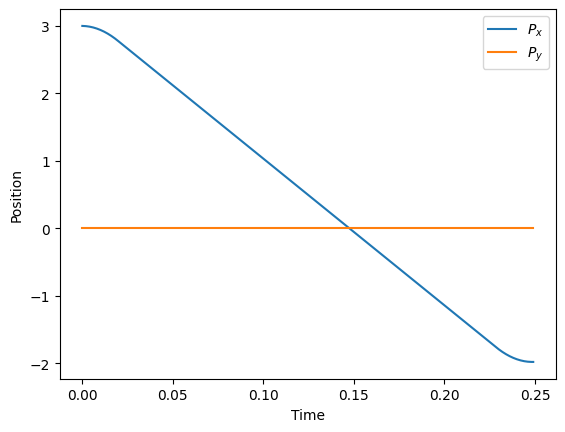

In [10]:
# Integrate Vx to get X
x = 3 + np.cumsum(vx*dt)
y = np.repeat(0.01, 0.25/dt) # Y is constant

# Plot X and Y against time
pyplot.plot(t, x, label="$P_x$")
pyplot.plot(t, y, label="$P_y$")
pyplot.xlabel("Time")
pyplot.ylabel("Position")
pyplot.legend()

Text(0.5, 1.0, 'First Joint Angle ($\\Theta_1$)')

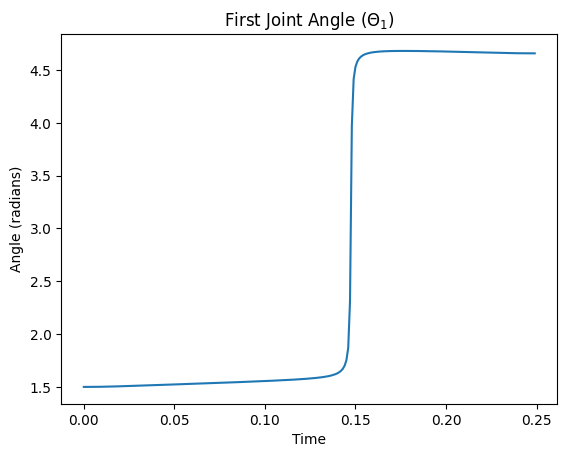

In [11]:
# Inverse Kinematics to get theta1
P = np.sqrt(x**2 + y**2)
theta1 = np.arctan2(y,x) + np.arccos(P/40)

pyplot.plot(t, theta1, label="$\Theta_1$")
pyplot.xlabel("Time")
pyplot.ylabel("Angle (radians)")
pyplot.title("First Joint Angle ($\Theta_1$)")

Text(0.5, 1.0, 'Second Joint Angle ($\\Theta_2$)')

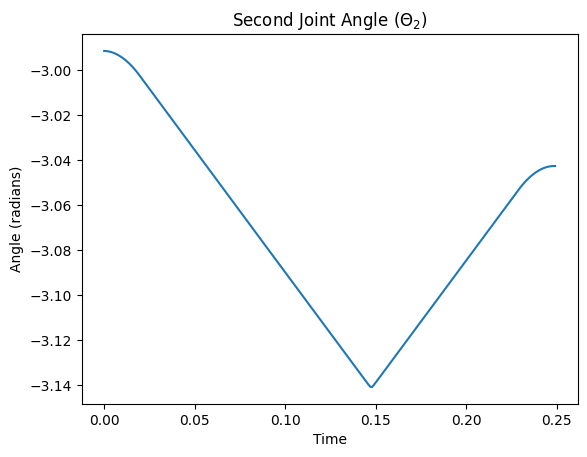

In [12]:
# Inverse Kinematics to get theta2
theta2 = np.arctan2(y - 20*np.sin(theta1), x - 20*np.cos(theta1)) - theta1

pyplot.plot(t, theta2, label="$\Theta_2$")
pyplot.xlabel("Time")
pyplot.ylabel("Angle (radians)")
pyplot.title("Second Joint Angle ($\Theta_2$)")

Text(0.5, 1.0, 'Second Joint Velocity ($\\dot{\\Theta}_2$)')

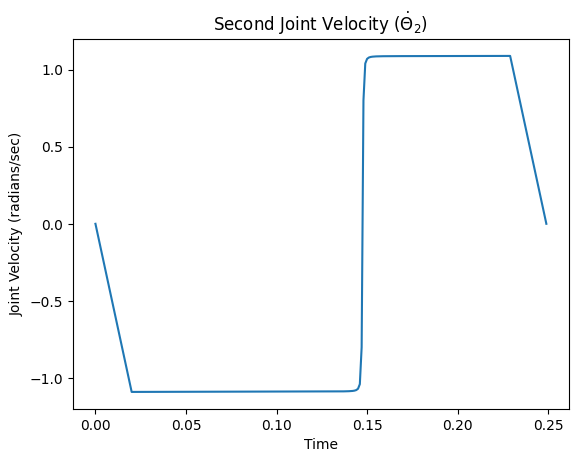

In [13]:
# Jacobian + algebra to get derivative of theta2
thetas = theta1+theta2
theta2d = vx / ((0.2/x)*np.cos(thetas) - 20*np.sin(thetas))

pyplot.plot(t, theta2d, label="$\dot{\Theta}_2$")
pyplot.xlabel("Time")
pyplot.ylabel("Joint Velocity (radians/sec)")
pyplot.title("Second Joint Velocity ($\dot{\Theta}_2$)")

Text(0.5, 1.0, 'First Joint Velocity ($\\dot{\\Theta}_1$)')

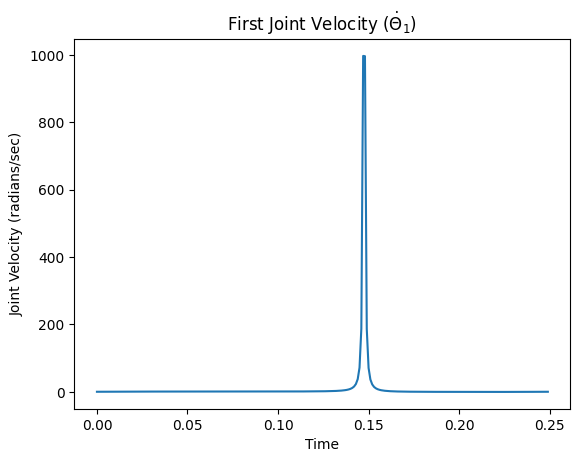

In [14]:
# Use theta2 derivative for theta1 derivative
theta1d = -20 * theta2d * np.cos(thetas) / x

pyplot.plot(t, theta1d, label="$\dot{\Theta}_1$")
pyplot.xlabel("Time")
pyplot.ylabel("Joint Velocity (radians/sec)")
pyplot.title("First Joint Velocity ($\dot{\Theta}_1$)")